In [ ]:
##Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
## Importing the dataset
df = pd.read_csv('/content/RTA Dataset.csv',header=0)

In [ ]:
df.duplicated().sum()

0

# Data Cleaning

In [ ]:
# Find the number of missing values present in each column
d.isnull().sum()

NameError: ignored

In [ ]:
df.info()

In [ ]:
df.isnull().mean().sort_values(ascending=False)*100

In [ ]:
missing_values_table(df)

Handling Categorical Missing values

In [ ]:
# Shows the columns with their number of catagories each variable is having
for col in df.columns:
    print(col, ':', len(df[col].unique()), 'catagories')

In [ ]:
### We will handle the catagorical missing value by replacing NaN values with a new catagory
def impute_nan(df,variable):
    df[variable]=np.where(df[variable].isnull(),"Unknown",df[variable])


In [ ]:
### Select all the attributes that have missing value and replace with "Unknown" Category
for cat in ['Educational_level','Vehicle_driver_relation','Driving_experience','Type_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured',
            'Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Type_of_collision','Vehicle_movement',
            'Work_of_casuality','Fitness_of_casuality','Pedestrian_movement']: impute_nan(df,cat)

In [ ]:
print(df.isnull().sum().sum(),"Missing value: All the missing values are handled")

0 Missing value: All the missing values are handled


Feature Selection

In [ ]:
data=df.copy()

In [ ]:
### Dropping the remaining variables
data.drop(['Time','Day_of_week','Type_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured','Road_allignment',
        'Road_surface_conditions','Number_of_vehicles_involved','Number_of_casualties','Casualty_class','Sex_of_casualty','Age_band_of_casualty',
        'Work_of_casuality','Fitness_of_casuality','Casualty_severity'], axis=1, inplace=True)

In [ ]:
data.head(3)

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury


In [ ]:
### The selected features are:
data.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

# Data Visualization

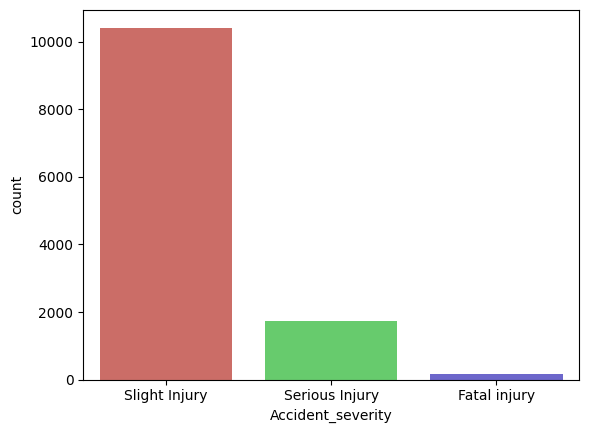

In [ ]:
sns.countplot(x='Accident_severity',data=data,palette='hls')
plt.show()

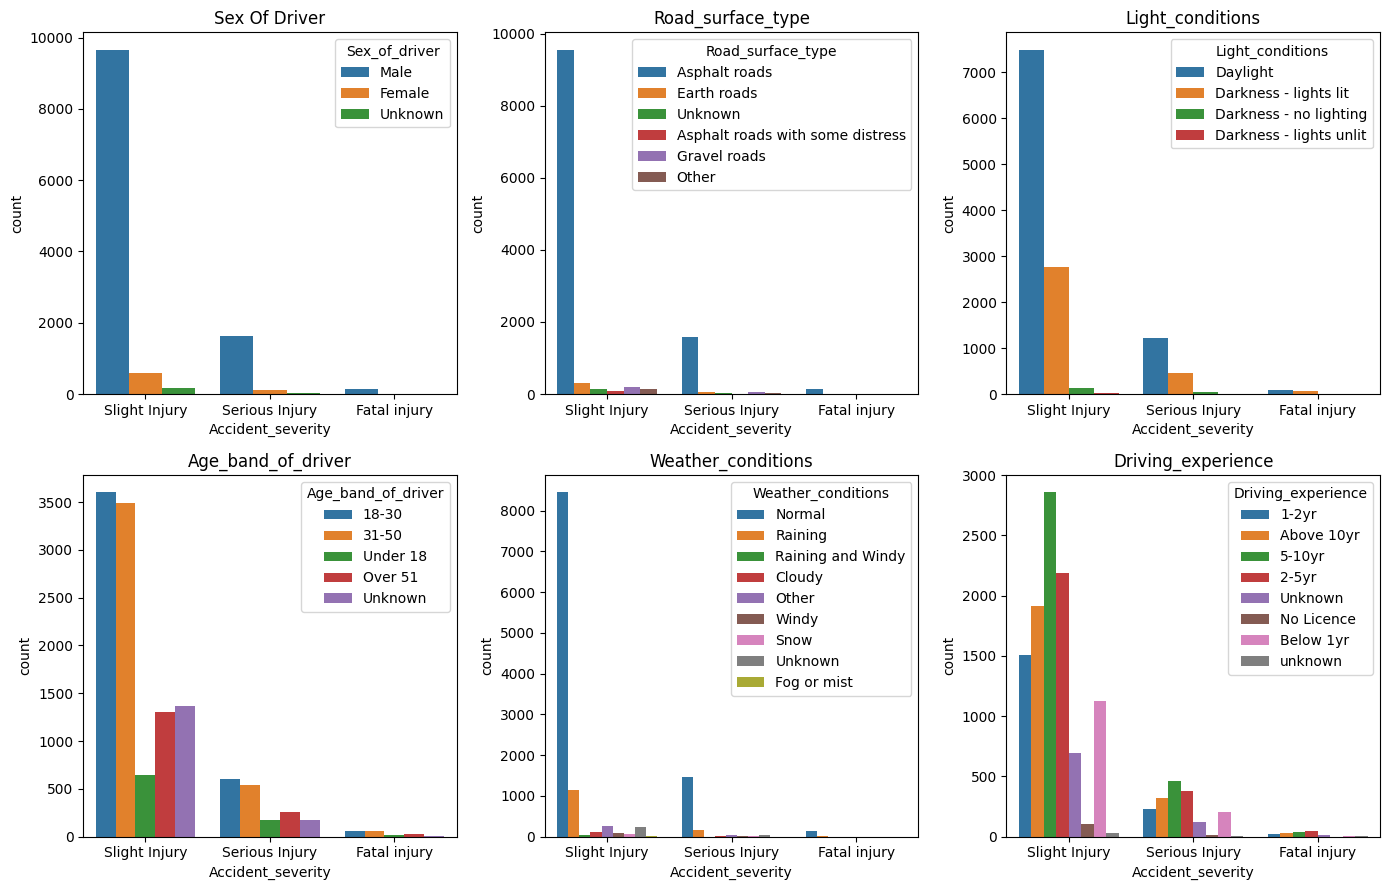

In [ ]:
# Countplots to visualize how each feature affects the ouput class

fig, axes = plt.subplots(2,3, figsize=(14,9))
axes[0,0].set_title('Sex Of Driver')
sns.countplot(x = 'Accident_severity', hue='Sex_of_driver', data = data, ax=axes[0,0])
axes[1,0].set_title('Age_band_of_driver')
sns.countplot(x = 'Accident_severity', hue='Age_band_of_driver', data = data, ax=axes[1,0])
axes[0,1].set_title('Road_surface_type')
sns.countplot(x = 'Accident_severity', hue='Road_surface_type', data = data, ax=axes[0,1])
axes[1,1].set_title('Weather_conditions')
sns.countplot(x = 'Accident_severity', hue='Weather_conditions', data = data, ax=axes[1,1])
axes[0,2].set_title('Light_conditions')
sns.countplot(x = 'Accident_severity', hue='Light_conditions', data = data, ax=axes[0,2])
axes[1,2].set_title('Driving_experience')
sns.countplot(x = 'Accident_severity', hue='Driving_experience', data = data, ax=axes[1,2])
plt.tight_layout()

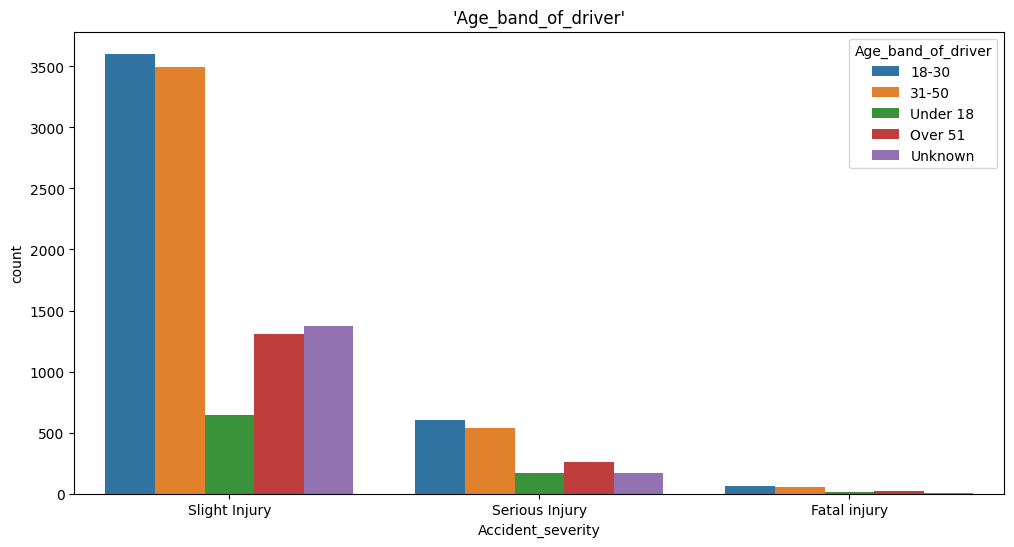

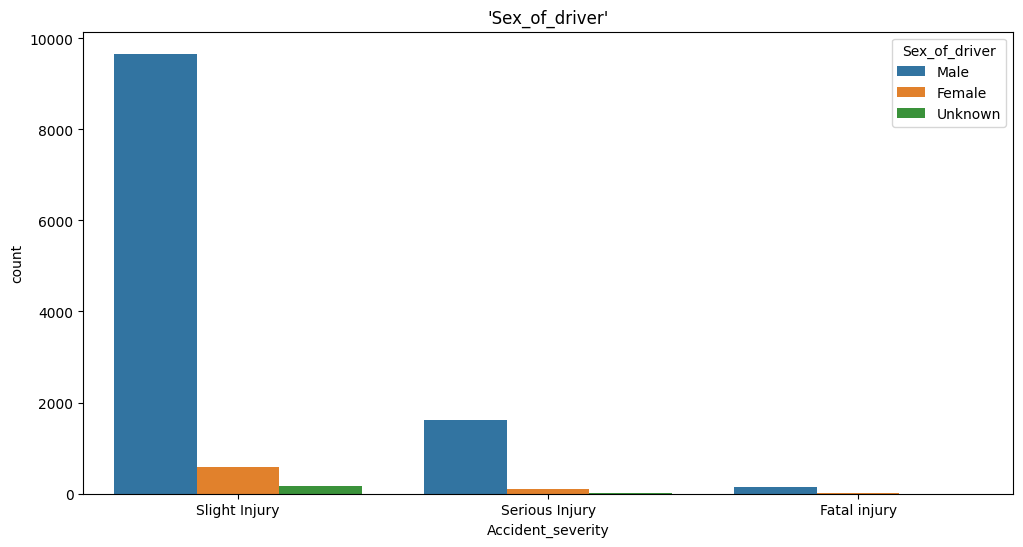

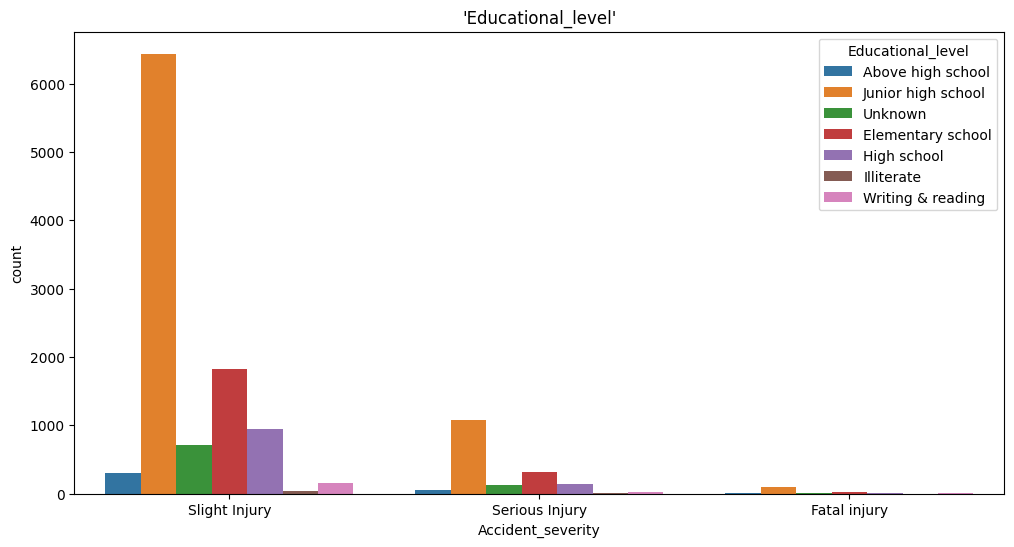

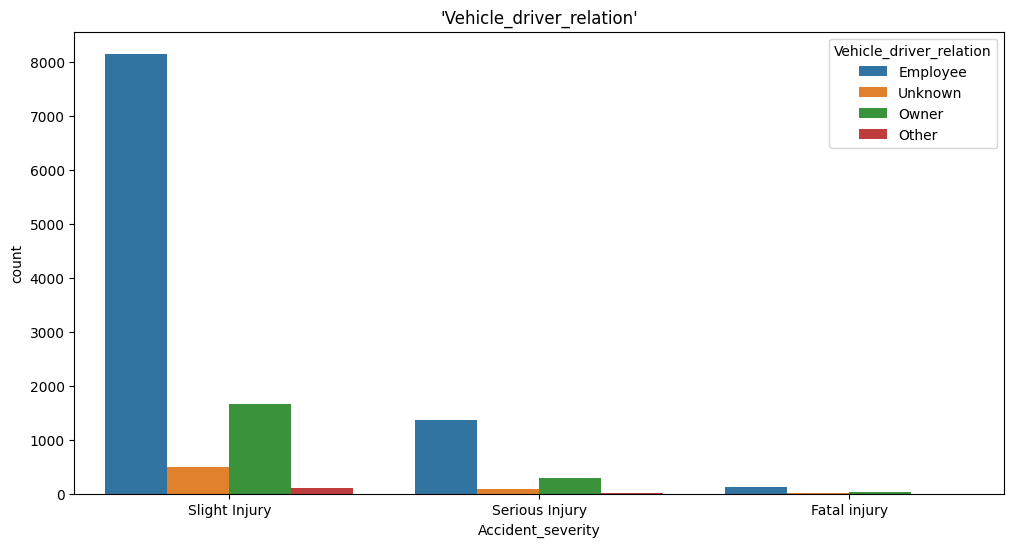

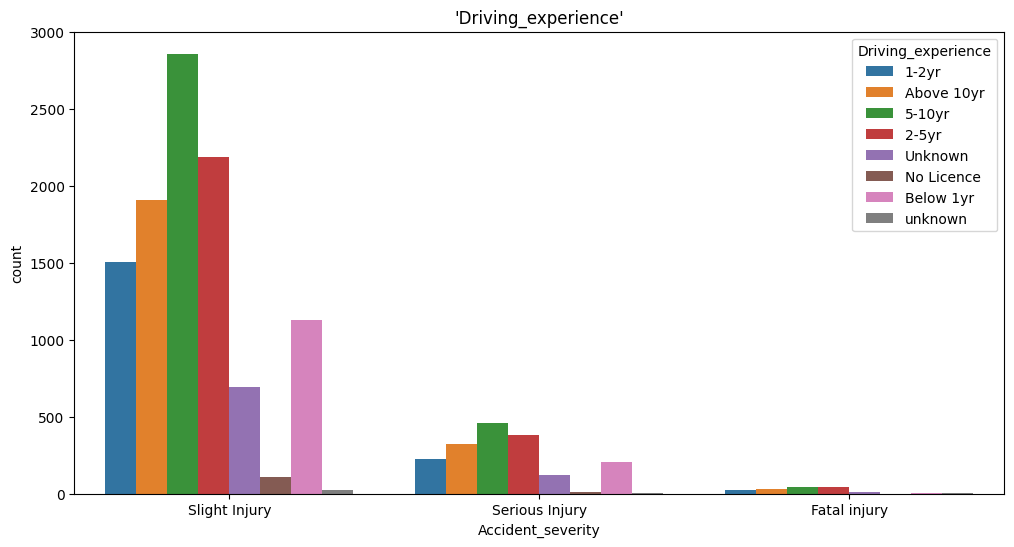

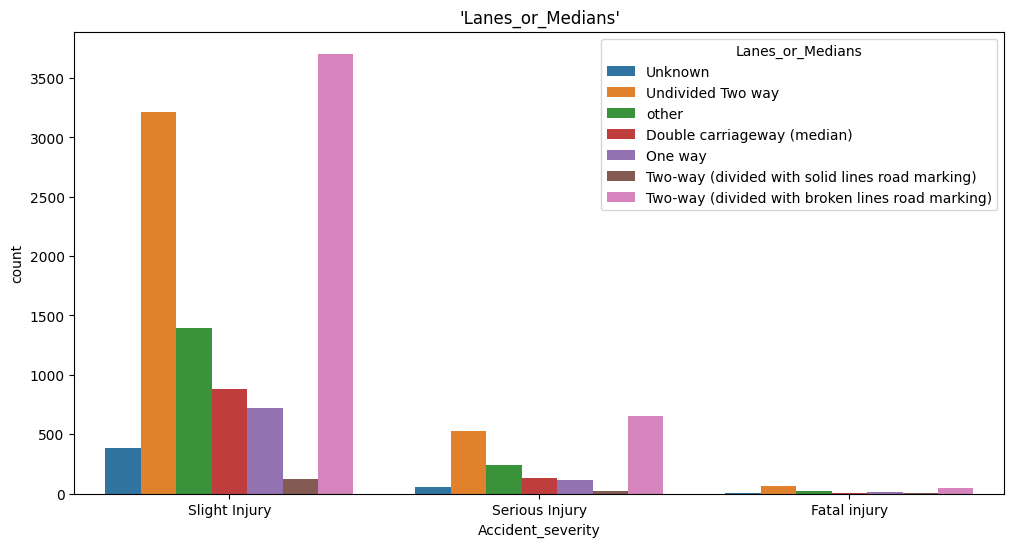

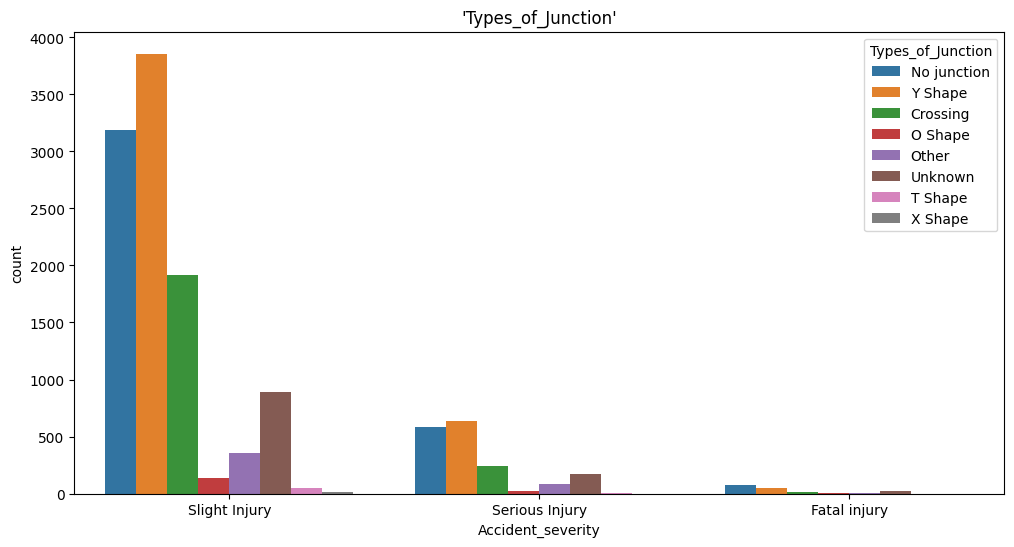

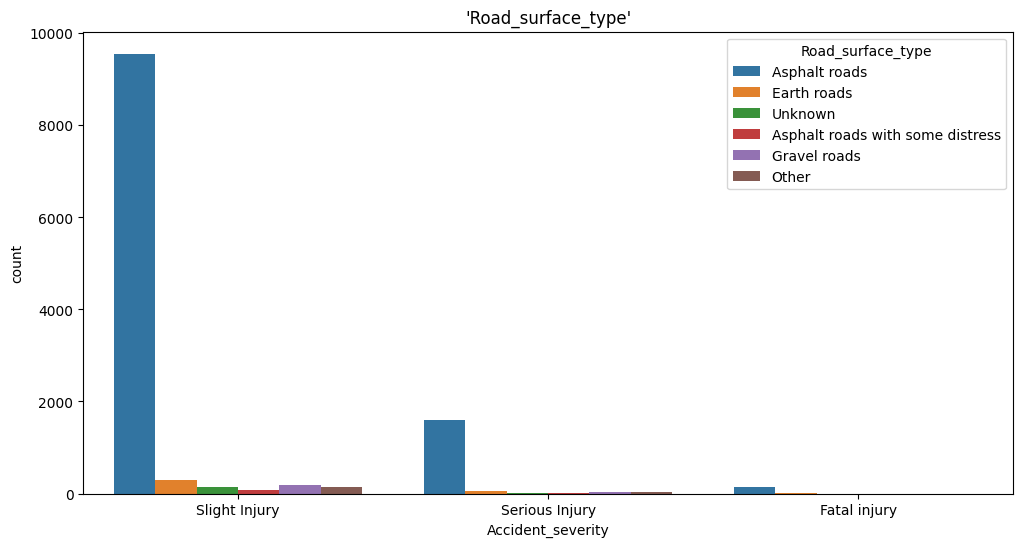

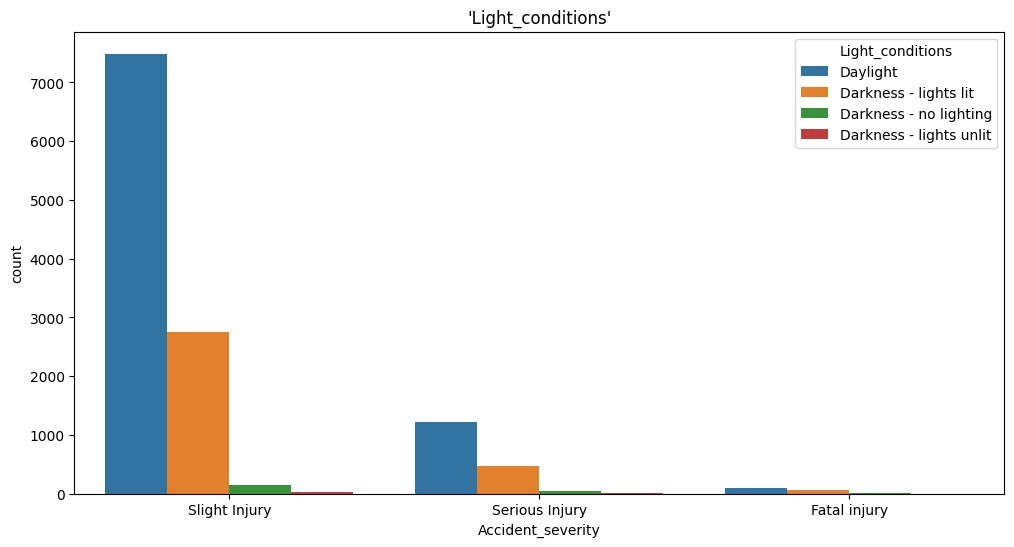

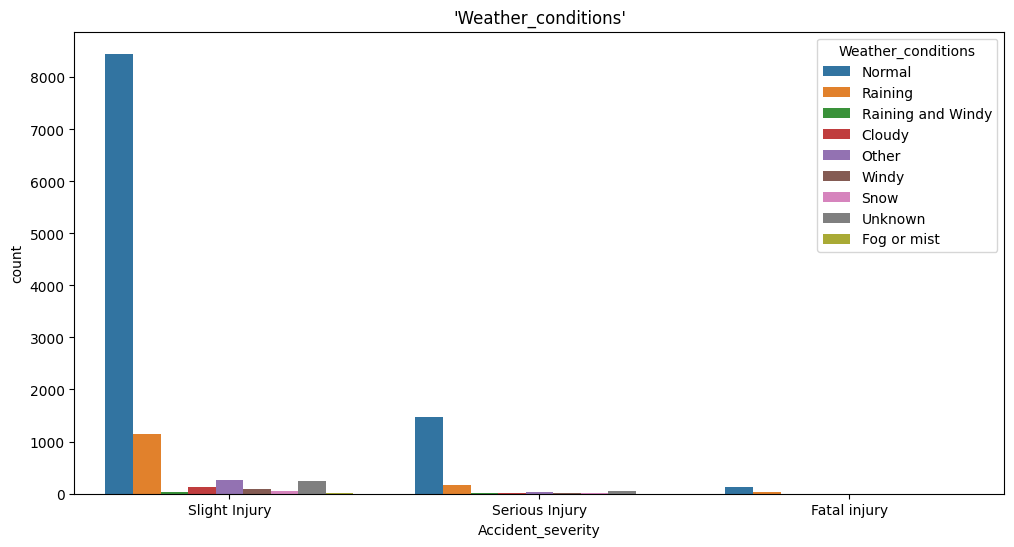

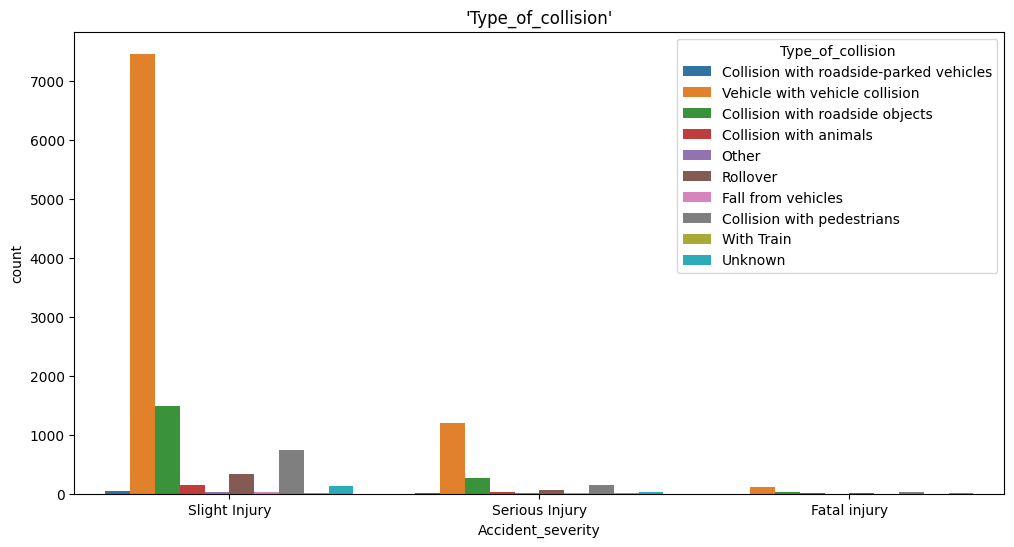

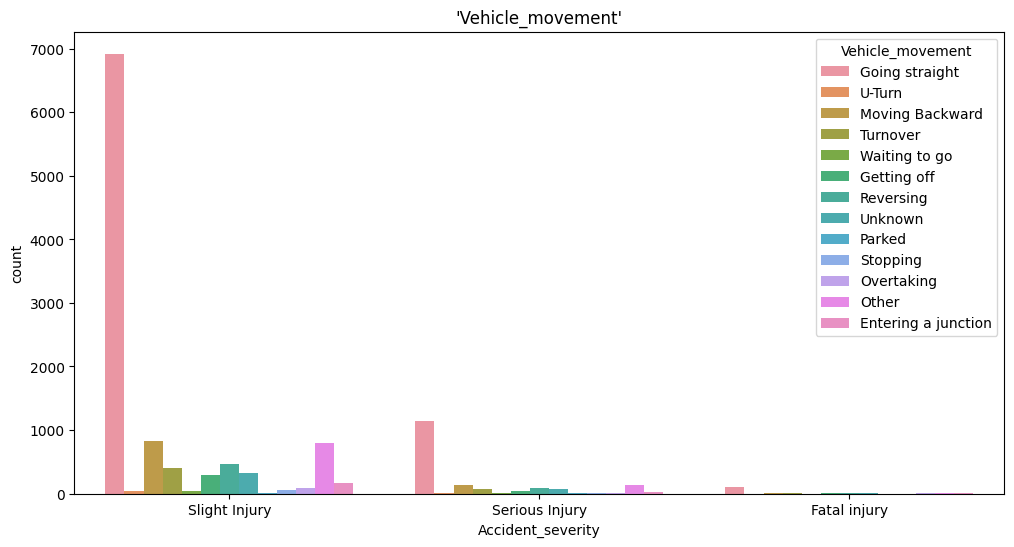

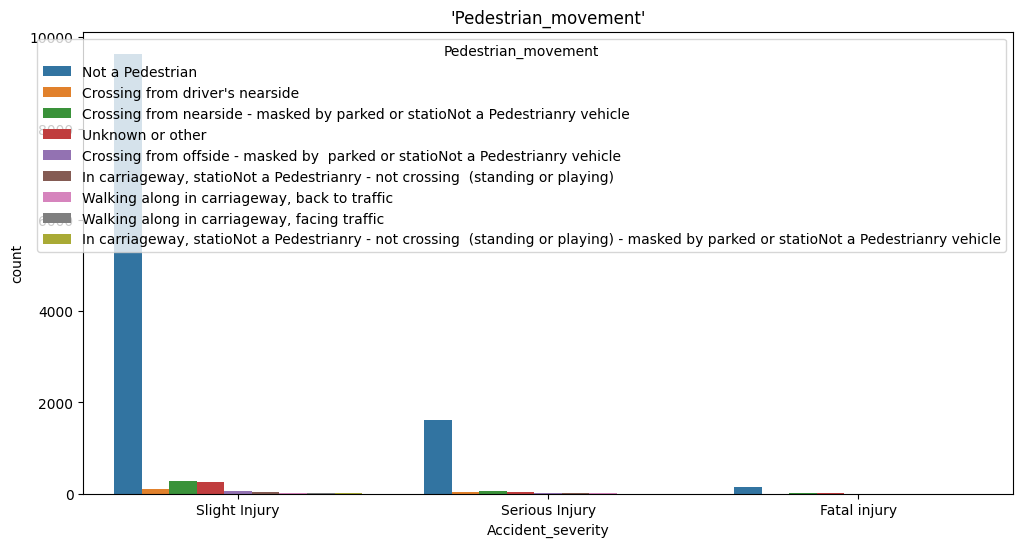

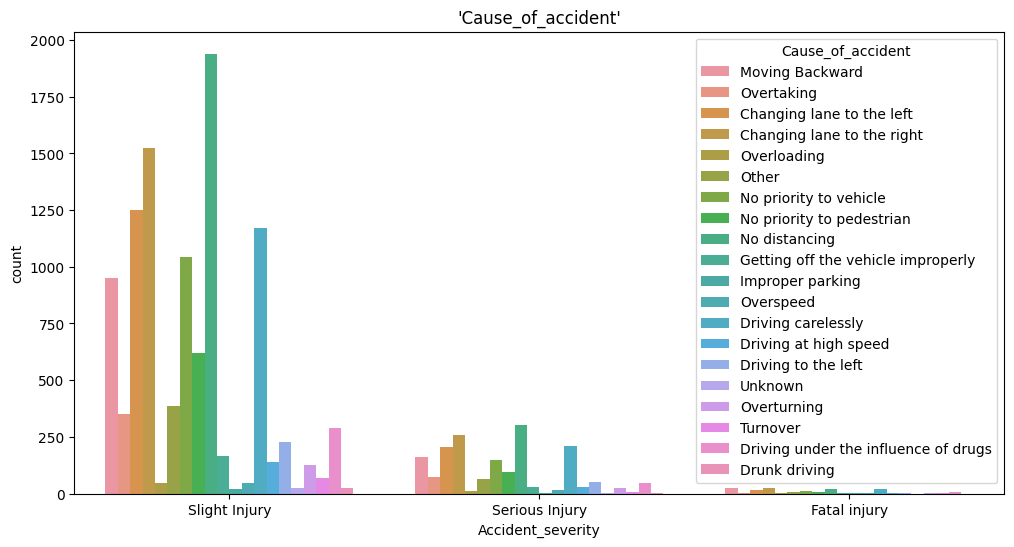

In [ ]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12, 6))
    plt.title("'%s'" % i)
    sns.countplot(x='Accident_severity', hue=i, data=data)


In [ ]:
data.shape

(12316, 15)

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Accident_severity'] = label_encoder.fit_transform(data['Accident_severity'])

data['Accident_severity'].unique()

array([2, 1, 0])

In [ ]:
data.sample(3)

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
9826,Over 51,Male,Junior high school,Employee,2-5yr,Two-way (divided with broken lines road marking),Crossing,Asphalt roads,Daylight,Raining,Collision with pedestrians,Going straight,Crossing from nearside - masked by parked or s...,Driving carelessly,2
11739,31-50,Male,Junior high school,Employee,1-2yr,Two-way (divided with broken lines road marking),Crossing,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overturning,1
5204,Unknown,Male,Junior high school,Employee,Above 10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with pedestrians,Moving Backward,Not a Pedestrian,No distancing,2


In [ ]:
data.to_csv('RTA cleaning.csv',index=False)